Bravo stats: (array(14.), array(28.))
Lexi stats: (array(14.), array(9.))


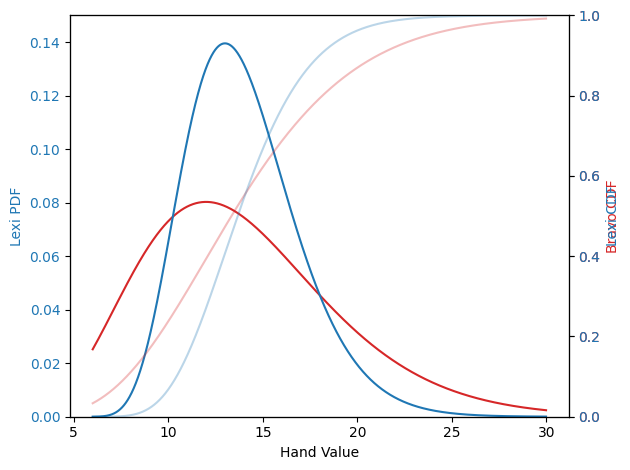

In [71]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2

#x-axis ranges from 0 to 20 with .001 steps
x = np.arange(6, 30, 0.01)

fig, ax1 = plt.subplots()

def hero_curves(hero_name, hero_color, df=1, loc=0, scale=1):
    hero_pdf = chi2.pdf(x, df=df, loc=loc, scale=scale)
    hero_cdf = chi2.cdf(x, df=df, loc=loc, scale=scale)
    hero_stats = chi2.stats(df=df, loc=loc, scale=scale, moments='mv')
    print(f'{hero_name} stats: {hero_stats}')
    ax1.set_xlabel('Hand Value')
    ax1.set_ylabel(f'{hero_name} PDF', color=hero_color)
    ax1.plot(x, hero_pdf, color=hero_color)
    ax1.tick_params(axis='y', labelcolor=hero_color)
    ax1.set_ylim([0,0.15])

    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
    # color = 'tab:blue'
    ax2.set_ylabel(f'{hero_name} CDF', color=hero_color)  # we already handled the x-label with ax1
    ax2.plot(x, hero_cdf, color=hero_color, alpha=0.3)
    ax2.tick_params(axis='y', labelcolor=hero_color)
    ax2.set_ylim([0,1])
    return ax1, ax2

hero_curves('Bravo', 'tab:red', df=14, loc=0, scale=1)
hero_curves('Lexi', 'tab:blue', df=18, loc=5, scale=0.5)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

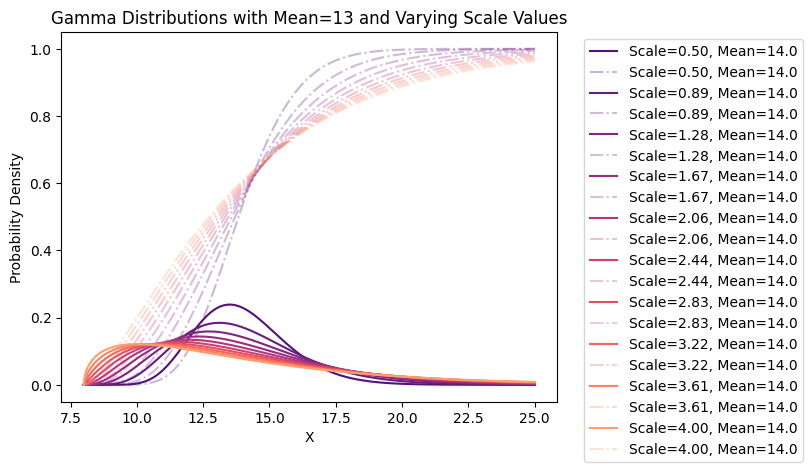

In [9]:
import matplotlib.pyplot as plt
from scipy.stats import gamma
import numpy as np

# Set the mean and create a range of x values
mean = 6
x = np.linspace(8, 25, 1000)  # Increase the number of data points

# Create a list of different scale values to use
scales = np.linspace(0.5,4,10)
cmap = plt.get_cmap('magma')
colors = cmap(np.linspace(0.25, 0.8, len(scales)))
# Loop over the scales, create the gamma distribution, and plot it
for i, scale in enumerate(scales):
    a = mean / scale
    dist = gamma(a=a, scale=scale, loc=8)
    plt.plot(x, dist.pdf(x), label=f"Scale={scale:.2f}, Mean={dist.mean()}", color=colors[i])
    plt.plot(x, dist.cdf(x), label=f"Scale={scale:.2f}, Mean={dist.mean()}", alpha=0.3, linestyle='-.', color=colors[i])

# Add a legend and labels to the plot
plt.legend()
plt.xlabel("X")
plt.ylabel("Probability Density")
plt.title("Gamma Distributions with Mean=13 and Varying Scale Values")
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.show()

In [ ]:
pdf = chi2.pdf(x, df=14)
cdf = chi2.cdf(x, df=14)